# **Import Libraries**

In [45]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# **Load MNIST Dataset**

In [46]:
mnist = fetch_openml('mnist_784', version=1)

x = mnist.data      # Image pixels (784 features)
y = mnist.target    # Digit labels (0–9)

# Convert labels from string to integer
y = y.astype(np.int8)

print("Total Data Shape:", x.shape)
print("Total Labels Shape:", y.shape)


Total Data Shape: (70000, 784)
Total Labels Shape: (70000,)


# **Split into Train & Test**

In [47]:
x_train = x[:60000]
x_test = x[60000:]

In [48]:
y_train = y[:60000]
y_test = y[60000:]

#  **Shuffle Training Data**

In [49]:
shuffle_index = np.random.permutation(60000)
x_train = x_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

# **Scale Data (Very Important)**

In [50]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Create Models**

In [51]:
log_model = LogisticRegression(max_iter=1000)
svm_model = SVC()
rf_model = RandomForestClassifier()

# **Train Models**

In [52]:
print("Training Logistic Regression...")
log_model.fit(x_train_scaled, y_train)

print("Training SVM...")
svm_model.fit(x_train_scaled, y_train)

print("Training Random Forest...")
rf_model.fit(x_train, y_train)


Training Logistic Regression...
Training SVM...
Training Random Forest...


RandomForestClassifier()

# **Predictions**

In [53]:
log_pred = log_model.predict(x_test_scaled)
svm_pred = svm_model.predict(x_test_scaled)
rf_pred = rf_model.predict(x_test)

#  **Evaluation Function**

In [54]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))

#  **Evaluate All Models**

In [55]:
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("SVM", y_test, svm_pred)
evaluate_model("Random Forest", y_test, rf_pred)


Logistic Regression Results:
Accuracy: 0.9221
Precision: 0.9219800859084953
Recall: 0.9221
F1 Score: 0.9219652430232179

SVM Results:
Accuracy: 0.966
Precision: 0.9661744572909773
Recall: 0.966
F1 Score: 0.966008366250687

Random Forest Results:
Accuracy: 0.9687
Precision: 0.9686976065294024
Recall: 0.9687
F1 Score: 0.9686852913806299


# **Confusion Matrix for Best Model (Usually SVM)**

In [56]:
best_pred = svm_pred

conf_matrix = confusion_matrix(y_test, best_pred)

print("\nConfusion Matrix (Best Model - SVM):")
print(conf_matrix)


Confusion Matrix (Best Model - SVM):
[[ 968    0    1    1    0    3    3    2    2    0]
 [   0 1127    3    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    4  979    1    7    0   12    7    0]
 [   0    0   12    0  944    2    4    7    3   10]
 [   2    0    1   10    2  854    6    8    7    2]
 [   6    2    1    0    4    8  930    2    5    0]
 [   1    6   13    2    3    0    0  990    0   13]
 [   3    0    4    6    6    9    3   14  926    3]
 [   4    6    5   11   12    2    0   20    3  946]]


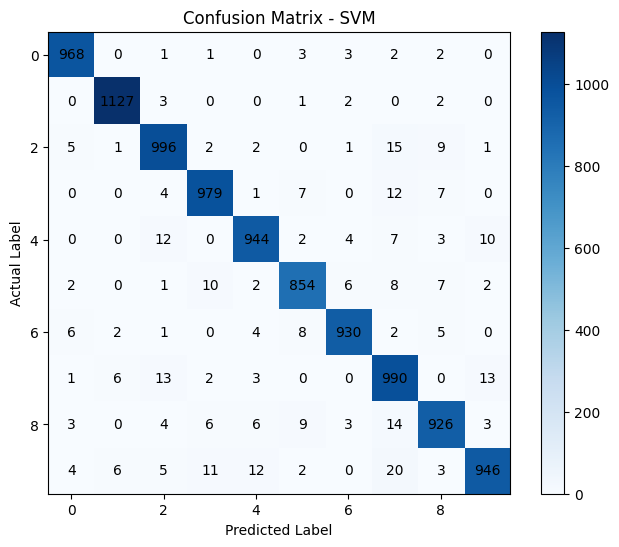

In [58]:
plt.figure(figsize=(8,6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()


for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_matrix[i, j],
                 ha="center", va="center", color="black")

plt.show()

In [59]:
import joblib

# Save trained model
joblib.dump(svm_model, "/content/drive/MyDrive/Machine_Learning_Projects/MNIST/model.pkl")

# Save scaler (important!)
joblib.dump(scaler, "/content/drive/MyDrive/Machine_Learning_Projects/MNIST/scaler.pkl")

print("Model and Scaler saved successfully")

Model and Scaler saved successfully


In [60]:
# Load saved model
model = joblib.load("/content/drive/MyDrive/Machine_Learning_Projects/MNIST/model.pkl")

# Load scaler
scaler = joblib.load("/content/drive/MyDrive/Machine_Learning_Projects/MNIST/scaler.pkl")